<a href="https://colab.research.google.com/github/SantiData87/yFinance/blob/main/argy_2011_hoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consultas sobre capacitaciones : albertcapacitaciondigital@gmail.com

# Librerias

In [1]:
!pip install yfinance

In [2]:
#Importar librerias - Clase
import pandas as pd
import numpy as np

from datetime import datetime

#importar yfinance (instalado arriba) para tener datos de mercado financiero
import yfinance as yf

#Importar librerias de Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Montar en drive
from google.colab import drive
import os

#drive.mount('/content/drive')
%cd '/content/drive/MyDrive/'
%ls

Mounted at /content/drive
/content/drive/MyDrive
'572 HACER.xlsx'                            'Documentos Importantes '/
 9f1609f2-ce18-43d4-92f4-b210c78b3c34.pdf   'Especial # Blanqueo muy flexible para invertir.pdf'
'Armado Patrimonio 2017 - 2023 -5SET.xlsx'  'Fotos Casamiento QR'/
'- BOLSA'/                                   HTC/
 Casamiento.gsheet                           LLC/
'Ciudadanía Italiana'/                      'ONs Base.xlsx'
 client_secret_spotify.txt                  'PANEL GENERAL - 12-08-2024.xlsx'
'Colab Notebooks'/                          'PANEL GENERAL - 21-08-2024.xlsx'
 CROWDIUM/                                  '- PEN DRIVE'/
'- CUBO MAGICO  - SOLUCION.docx'             receipt.pdf
'- DATA'/                                    RUCA.pdf
 DEFINITIVA.xlsx


In [4]:
#formateo de dataframes dinamico
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [5]:
#Estilo de Graficos
mpl.style.use('_mpl-gallery-nogrid')

# Datos----------------------
Tickers Argy:

MELI
DESP
GLOB

VIST
YPF
PAM
CEPU
TGS
EDN

BMA
GGAL
BBAR
SUPV

TS
TX
TEO
CRESY
IRS
LOMA





In [6]:
#DATOS
ticker = 'PAM'
DESDE  = '2011-01-01'
HASTA = datetime.now().strftime("%Y-%m-%d")
INTERVALO = '1d'
TARGET = 'Adj Close'

#PRECIO = precios_historicos['Close']
print(HASTA)


2024-09-18


In [7]:
#hago una funcion para ocultar
#la sintaxis de la libreria y usar mi formato
#podria llamar a la funcion download directamente
#tambien
def market_data (ticker,desde,hasta,intervalo):
    datos=yf.download(ticker, start=desde, end=hasta,interval=intervalo)
    return datos

In [8]:
#bajar datos para un periodo especifico usando la funcion de arriba
precios_historicos = market_data(ticker,
                                 desde= DESDE,
                                 hasta= HASTA,
                                 intervalo= INTERVALO)

[*********************100%***********************]  1 of 1 completed


# DF

Mostrar el dataframe sin necesidad de imprimirlo, dentro del notebook

Observar la interactividad, dada por la libreria de Google Colab cuando hicimos la importacion arriba de todo.

In [9]:
precios_historicos

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,17.209999,17.459999,17.160000,17.299999,17.091591,46900
2011-01-04,17.240000,17.299999,16.700001,16.940001,16.735929,34200
2011-01-05,17.049999,17.100000,16.600000,17.049999,16.844604,26000
2011-01-06,17.200001,17.200001,16.150000,16.650000,16.449423,90300
2011-01-07,16.809999,16.809999,16.150000,16.610001,16.409904,72800
...,...,...,...,...,...,...
2024-09-11,58.000000,59.840000,57.509998,58.689999,58.689999,282600
2024-09-12,58.549999,59.770000,57.889999,58.990002,58.990002,259500
2024-09-13,59.099998,59.700001,58.459999,59.139999,59.139999,261900


# Grafico Precio



In [10]:
PRECIO= precios_historicos[TARGET]
PRECIO

,Adj Close
Date,
2011-01-03,17.091591
2011-01-04,16.735929
2011-01-05,16.844604
2011-01-06,16.449423
2011-01-07,16.409904
...,...
2024-09-11,58.689999
2024-09-12,58.990002
2024-09-13,59.139999


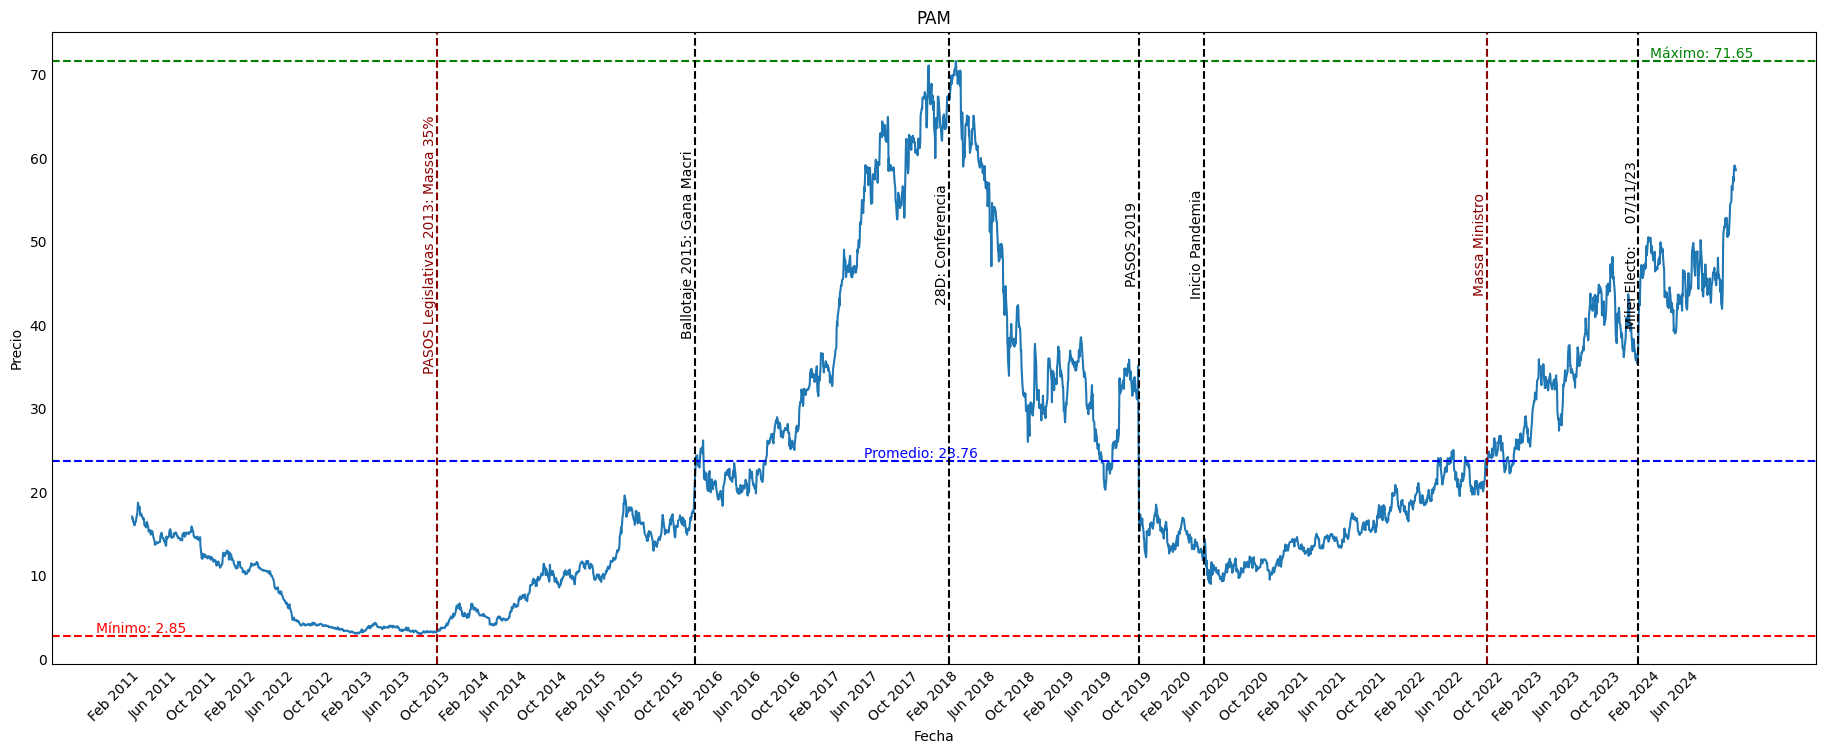

In [11]:
# Definir el tamaño de la figura
plt.figure(figsize=(18, 8))

# Graficar
PRECIO.plot()

# Agregar líneas horizontales para valores estadísticos y verticales para fechas específicas

# Obtener valores estadísticos
precio_maximo = PRECIO.max()
precio_promedio = PRECIO.mean()
precio_minimo = PRECIO.min()

# Trazar líneas horizontales en los valores estadísticos
plt.axhline(y=precio_maximo, color='g', linestyle='--', label=f'Máximo: {precio_maximo:.2f}')
plt.axhline(y=precio_promedio, color='b', linestyle='--', label=f'Promedio: {precio_promedio:.2f}')
plt.axhline(y=precio_minimo, color='r', linestyle='--', label=f'Mínimo: {precio_minimo:.2f}')

# Trazar líneas verticales en fechas específicas
plt.axvline(x='2013-08-12', color='darkred', linestyle='--', label=f'PASOS Legislativas 2013: Pierden los K')
plt.axvline(x='2015-10-25', color='k', linestyle='--', label='Ballotaje 2015: Gana Macri')
plt.axvline(x='2017-12-28', color='k', linestyle='--', label='28D: Conferencia')
plt.axvline(x='2019-08-11', color='k', linestyle='--', label='PASOS 2019')
plt.axvline(x='2020-03-01', color='k', linestyle='--', label='Inicio Pandemia')
plt.axvline(x='2022-08-03', color='darkred', linestyle='--', label='Massa Ministro 01 Jun 2022')
plt.axvline(x='2023-11-17', color='k', linestyle='--', label=f'Milei Electo 17 Nov 2023')


# Establecer los marcadores mensuales en el eje x
fechas_mensuales = pd.date_range(start=PRECIO.index.min(), end=PRECIO.index.max(), freq='4MS')
plt.xticks(fechas_mensuales, [date.strftime('%b %Y') for date in fechas_mensuales], rotation=45)

# Agregar título y nombres de ejes
plt.title(ticker)
plt.xlabel('Fecha')
plt.ylabel('Precio')

# Calcular las coordenadas para las etiquetas de los ejes horizontales
coord_y_max = precio_maximo
coord_y_promedio = precio_promedio
coord_y_min = precio_minimo

# Ajustar la alineación para ubicar las etiquetas a la derecha y hacia arriba
ha_alignment = 'center'
va_alignment = 'bottom'

# Agregar etiquetas a las líneas horizontales
plt.text(fechas_mensuales[-1], coord_y_max, f'Máximo: {precio_maximo:.2f}', rotation=0, color='g', ha=ha_alignment, va=va_alignment)
plt.text(fechas_mensuales[int(len(fechas_mensuales) / 2)], coord_y_promedio, f'Promedio: {precio_promedio:.2f}', rotation=0, color='b', ha=ha_alignment, va=va_alignment)
plt.text(fechas_mensuales[0], coord_y_min, f'Mínimo: {precio_minimo:.2f}', rotation=0, color='r', ha=ha_alignment, va=va_alignment)
# Calcular la altura media
altura_media = (precio_maximo + precio_minimo) / 1.5

# Agregar etiquetas a las líneas verticales en la mitad superior del gráfico
plt.text('2013-08-12', altura_media, 'PASOS Legislativas 2013: Massa 35%', rotation=90, color='darkred', ha='right', va='center')
plt.text('2015-10-25', altura_media, 'Ballotaje 2015: Gana Macri', rotation=90, color='k', ha='right', va='center')
plt.text('2017-12-28', altura_media, '28D: Conferencia', rotation=90, color='k', ha='right', va='center')
plt.text('2019-08-11', altura_media, 'PASOS 2019', rotation=90, color='k', ha='right', va='center')
plt.text('2020-03-01', altura_media, 'Inicio Pandemia', rotation=90, color='k', ha='right', va='center')
plt.text('2022-08-03', altura_media, 'Massa Ministro', rotation=90, color='darkred', ha='right', va='center')
plt.text('2023-11-17', altura_media, 'Milei Electo:     07/11/23', rotation=90, color='k', ha='right', va='center')

# Guardar el gráfico en una carpeta llamada "MisGraficos" en Google Drive
#plt.savefig('/content/drive/My Drive/Colab Notebooks/PyGraficos/Argy_2013-HOY.png')

# Mostrar el gráfico
plt.show()

# Grafico------------------

In [12]:
# Precios
min_close = precios_historicos['Adj Close'].min()
max_close = precios_historicos['Adj Close'].max()
today_close = precios_historicos['Adj Close'].iloc[-1]
milei_electo_close = precios_historicos['Adj Close']['2023-11-17']
massa_electo_close = precios_historicos['Adj Close']['2022-08-03']
#Diferencias Porcentuales de los Precios
dif_porc_max = ((max_close - today_close) / today_close) * 100
dif_porc_min = ((min_close - today_close) / today_close) * 100
dif_porc_max_min = ((max_close - min_close) / min_close) * 100
dif_porc_milei_hoy =  (( today_close - milei_electo_close) / milei_electo_close) * 100
dif_porc_massa_hoy =  (( today_close - massa_electo_close) / massa_electo_close) * 100


#Fechas
from datetime import datetime
max_date = precios_historicos['Adj Close'].idxmax()
max_date = datetime.strftime(max_date, '%Y-%m-%d')
min_date = precios_historicos['Adj Close'].idxmin()
min_date = datetime.strftime(min_date, '%Y-%m-%d')
last_date = precios_historicos.index[-1]
last_date = datetime.strftime(last_date, '%Y-%m-%d')
first_date = precios_historicos.index[0]
first_date = datetime.strftime(first_date, '%Y-%m-%d')
ballotage_date = '2023-11-17'
massa_date = '2022-08-03'
# Convertir Fechas de strings to datetime objects
max_date = pd.to_datetime(max_date)
min_date = pd.to_datetime(min_date)
last_date = pd.to_datetime(last_date)
first_date = pd.to_datetime(first_date)
ballotage_date = pd.Timestamp(ballotage_date)
massa_date = pd.Timestamp(massa_date)
# Calculate the difference between the two dates
dif_max_last = max_date - last_date
dif_min_last = min_date - last_date
dif_max_min = max_date - min_date
dif_milei_today_date = last_date - ballotage_date
dif_massa_today_date = last_date - massa_date


# Resultado
print(f"El valor de {ticker} hoy ({last_date.strftime('%Y-%m-%d')}) es USD {today_close:.1f} ")
print('-------------------------------------------------------------------------------------------')
print(f"El valor MAXIMO fue USD {max_close:.1f} ")
print(f"Para alcanzar el valor MAXIMO {ticker} debe subir: {dif_porc_max:.0f}%")
print(f"Es MAXIMO se alcanzó el: {max_date.strftime('%Y-%m-%d')} hace {dif_max_last.days} dias o {dif_max_last.days/365:.1f} años ")
print('-------------------------------------------------------------------------------------------')
print(f"El valor MINIMO fue USD {min_close:.1f} ")
print(f"Para alcanzar el valor MINIMO {ticker} debe bajar: {dif_porc_min:.0f}%")
print(f"Ese MINIMO se alcanzó el: {min_date.strftime('%Y-%m-%d')} hace {dif_min_last.days} dias o {dif_min_last.days/365:.1f} años ")
print('-------------------------------------------------------------------------------------------')
print(f"La diferencia porcentual entre el valor de maximo y minimo es: {dif_porc_max_min:.0f}%")
print(f"Esta diferencia maxima se alcanzo luego de: {dif_max_min.days} dias o {dif_max_min.days/365:.1f} años ")
print('-------------------------------------------------------------------------------------------')
print(f"El valor de {ticker} el dia que fue electo Milei el {ballotage_date.strftime('%Y-%m-%d')} (hace {dif_milei_today_date.days} dias o {dif_milei_today_date.days/365:.1f} años) era USD {milei_electo_close:.1f} ")
print(f"La diferencia porcentual entre el dia que fue electo Milei y Hoy es: {dif_porc_milei_hoy:.0f}%")
print('-------------------------------------------------------------------------------------------')
print(f"El valor de {ticker} el dia que fue asumio Massa como ministro el {massa_date.strftime('%Y-%m-%d')} (hace {dif_massa_today_date.days} dias o {dif_massa_today_date.days/365:.1f} años) era USD {massa_electo_close:.1f} ")
print(f"La diferencia porcentual entre el dia que asumio Massa como ministro y Hoy es: {dif_porc_massa_hoy:.0f}%")

El valor de PAM hoy (2024-09-17) es USD 58.6 
-------------------------------------------------------------------------------------------
El valor MAXIMO fue USD 71.7 
Para alcanzar el valor MAXIMO PAM debe subir: 22%
Es MAXIMO se alcanzó el: 2018-01-17 hace -2435 dias o -6.7 años 
-------------------------------------------------------------------------------------------
El valor MINIMO fue USD 2.8 
Para alcanzar el valor MINIMO PAM debe bajar: -95%
Ese MINIMO se alcanzó el: 2013-06-21 hace -4106 dias o -11.2 años 
-------------------------------------------------------------------------------------------
La diferencia porcentual entre el valor de maximo y minimo es: 2414%
Esta diferencia maxima se alcanzo luego de: 1671 dias o 4.6 años 
-------------------------------------------------------------------------------------------
El valor de PAM el dia que fue electo Milei el 2023-11-17 (hace 305 dias o 0.8 años) era USD 37.1 
La diferencia porcentual entre el dia que fue electo Milei y

# Graph Precio Dinamico

In [13]:
import plotly.express as px

precios_historicos_no_index = precios_historicos.reset_index()

fig=px.line(data_frame=precios_historicos_no_index,x='Date',y='Close',title=ticker,\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# Graph: Volatilidad

In [14]:
#Cambio porcentual respecto al dia anterior
cambio_porcentual = precios_historicos.pct_change()*100

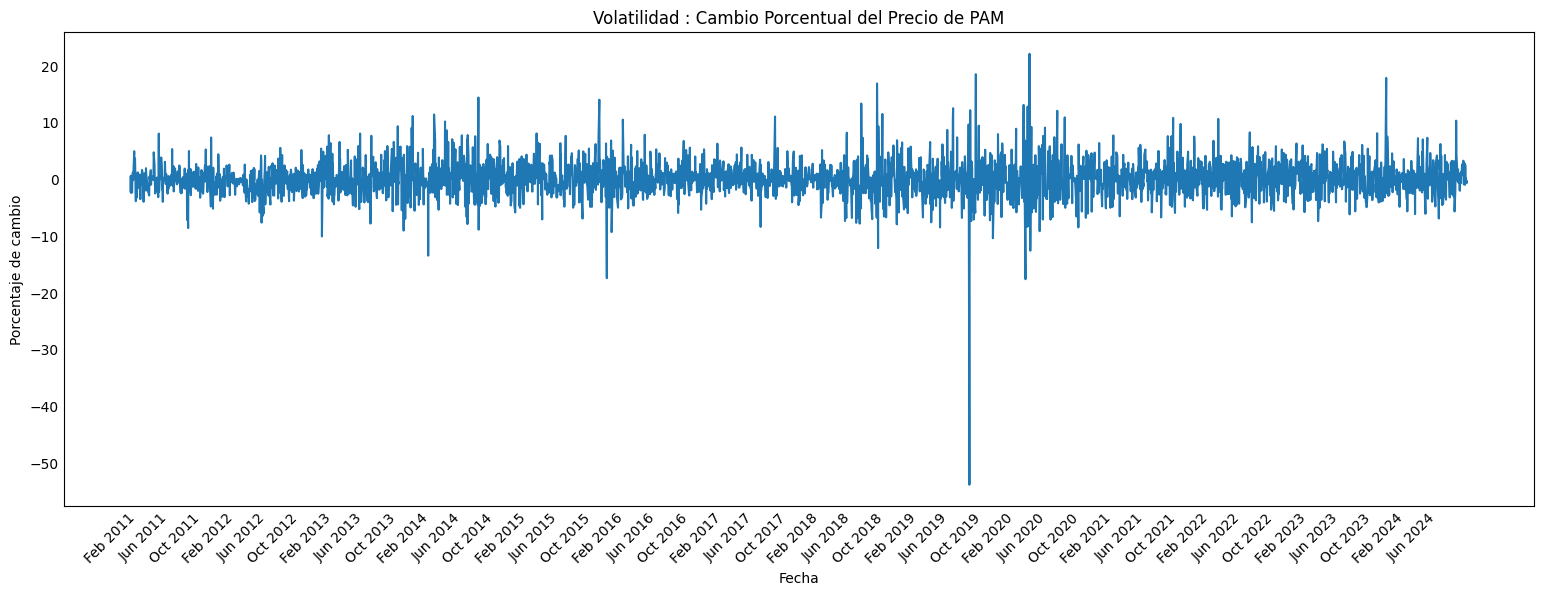

In [15]:
import matplotlib.pyplot as plt


cambio_porcentual['Close'].nlargest(10)
cambio_porcentual['Close'].nsmallest(10)

#f"El valor MAXIMO fue USD {ticker} ")

# Calcular las fechas mensuales
fechas_mensuales = pd.date_range(start=cambio_porcentual.index.min(), end=cambio_porcentual.index.max(), freq='4MS')

# Graficar el cambio porcentual
cambio_porcentual['Close'].plot(kind='line', figsize=(15, 6), xlabel='Fecha', ylabel='Porcentaje de cambio', title=f'Volatilidad : Cambio Porcentual del Precio de {ticker}')

# Establecer los marcadores mensuales en el eje x
plt.xticks(fechas_mensuales, [date.strftime('%b %Y') for date in fechas_mensuales], rotation=45)

# Mostrar el gráfico
plt.show()


In [16]:
# prompt: seleccionar los 5 valores maximos de cambio_porcentual
print('Top 5 Incremento AL ALZA diario: ')
cambio_porcentual['Adj Close'].nlargest(5)

Top 5 Incremento AL ALZA diario: 


,Adj Close
Date,
2020-03-24,22.172948
2019-09-05,18.575848
2023-11-20,17.916889
2018-08-31,16.941989
2014-07-30,14.473687


In [17]:
print('Top 5 Incremento A LA BAJA diario: ')
print(cambio_porcentual['Close'].nsmallest(5))

Top 5 Incremento A LA BAJA diario: 
Date
2019-08-12   -53.815490
2020-03-09   -17.572603
2015-11-23   -17.391303
2014-01-23   -13.429754
2020-03-27   -12.554111
Name: Close, dtype: float64


# FIN